# グリークスの変化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ivolat3

In [2]:
s_df = pd.read_pickle('./data/s.pickle')
op_pn = pd.read_pickle('./data/op1.pickle')
t0 = pd.to_datetime('2018-02-26 15:15')
t1 = pd.to_datetime('2018-03-09 09:00')
s0 = s_df.loc[t0, '1803']
r = 0.001
delta_t = t1 - t0
t = (delta_t.days / 365) + (delta_t.seconds / 31536000)
op_df = op_pn.loc['2018-02-26 15:15'].dropna().copy()
op_df['k'] = op_df.index

## 原資産による変化

In [3]:
delta_call = op_df.apply(lambda x: ivolat3.delta(
    s0, x['k'], r, 0, t, x['iv'], 'C'), axis=1)

delta_call = pd.Series(delta_call.values, index=op_df['k'])
delta25_call = delta_call.map(lambda x: abs(x - 0.25)).idxmin() 
call_df = op_df.loc[op_df['Call/Put'] == 'C'].copy()
k_max = call_df['k'].max()

### デルタの変化

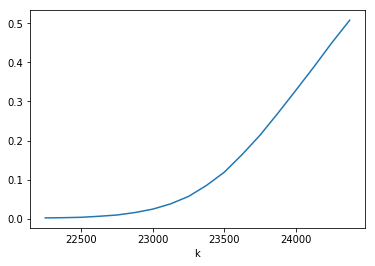

In [4]:
call_df.apply(lambda x: ivolat3.delta_call(x['k'], k_max, r, 0, t, x['iv']), axis=1).plot()

### ガンマの変化

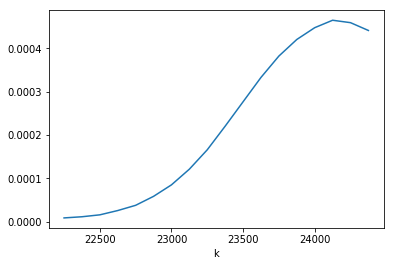

In [5]:
call_df.apply(lambda x: ivolat3.gamma(x['k'], k_max, r, 0, t, x['iv']), axis=1).plot()

### ベガの変化

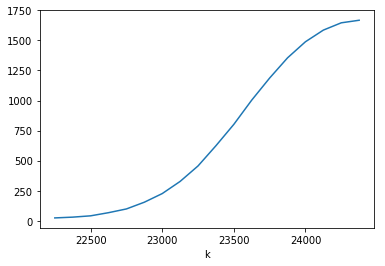

In [6]:
call_df.apply(lambda x: ivolat3.vega(x['k'], k_max, r, 0, t, x['iv']), axis=1).plot()

### セータの変化

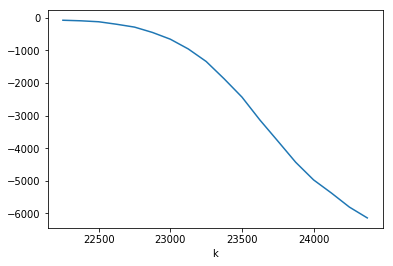

In [7]:
call_df.apply(lambda x: ivolat3.theta_call(x['k'], k_max, r, 0, t, x['iv']), axis=1).plot()

## 時間経過(タイムディケイ)による変化

In [8]:
t_range = [t - i/365 for i in range(1, 11)]
sigma25 = call_df.loc[delta25_call, 'iv']

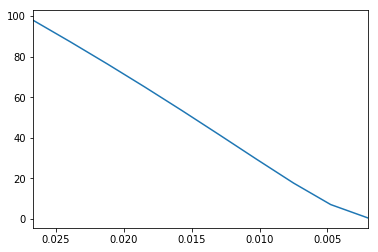

In [9]:
call_price_t = [ivolat3.prem_call(s0, delta25_call, r, 0, t_ ,sigma25) for t_ in t_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_range, call_price_t)
plt.xlim(max(t_range), min(t_range))
plt.show()

### デルタの変化

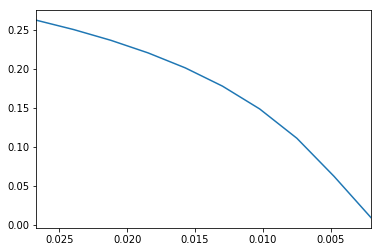

In [10]:
call_delta_t = [ivolat3.delta_call(s0, delta25_call, r, 0, t_ ,sigma25) for t_ in t_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_range, call_delta_t)
plt.xlim(max(t_range), min(t_range))
plt.show()

### ガンマの変化

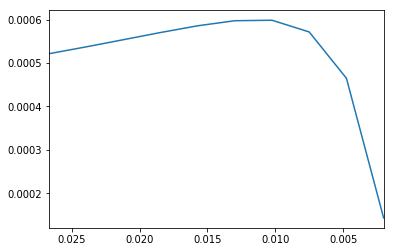

In [11]:
call_gamma_t = [ivolat3.gamma(s0, delta25_call, r, 0, t_ ,sigma25) for t_ in t_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_range, call_gamma_t)
plt.xlim(max(t_range), min(t_range))
plt.show()

### ベガの変化

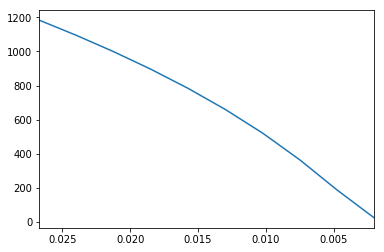

In [12]:
call_vega_t = [ivolat3.vega(s0, delta25_call, r, 0, t_ ,sigma25) for t_ in t_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_range, call_vega_t)
plt.xlim(max(t_range), min(t_range))
plt.show()

### セータの変化

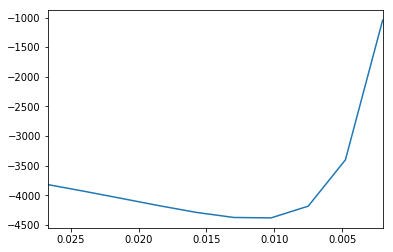

In [13]:
call_theta_t = [ivolat3.theta_call(s0, delta25_call, r, 0, t_ ,sigma25) for t_ in t_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_range, call_theta_t)
plt.xlim(max(t_range), min(t_range))
plt.show()

## ボラティリティによる変化

In [14]:
sigma_range = np.arange(0.1, 0.3, 0.01)

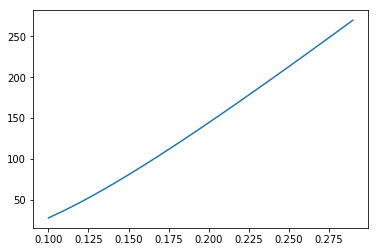

In [15]:
call_price_sigma = [ivolat3.prem_call(s0, delta25_call, r, 0, t ,sigma_) for sigma_ in sigma_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sigma_range, call_price_sigma)
plt.show()

### デルタの変化

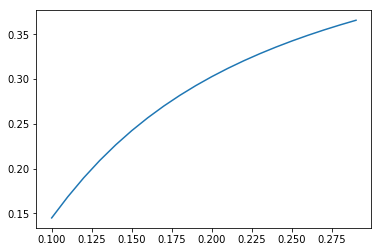

In [20]:
call_delta_sigma = [ivolat3.delta_call(s0, delta25_call, r, 0, t ,sigma_) for sigma_ in sigma_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sigma_range, call_delta_sigma)
plt.show()

### ガンマの変化

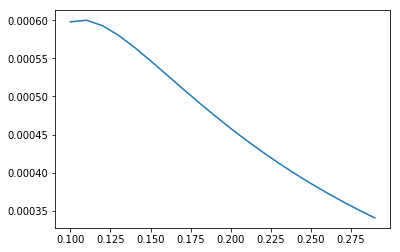

In [21]:
call_gamma_sigma = [ivolat3.gamma(s0, delta25_call, r, 0, t ,sigma_) for sigma_ in sigma_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sigma_range, call_gamma_sigma)
plt.show()

### ベガの変化

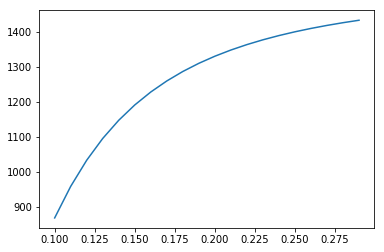

In [22]:
call_vega_sigma = [ivolat3.vega(s0, delta25_call, r, 0, t ,sigma_) for sigma_ in sigma_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sigma_range, call_vega_sigma)
plt.show()

### セータの変化

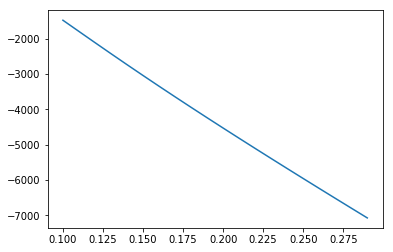

In [23]:
call_theta_sigma = [ivolat3.theta_call(s0, delta25_call, r, 0, t ,sigma_) for sigma_ in sigma_range]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sigma_range, call_theta_sigma)
plt.show()